In [129]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use(['science','ieee',])



In [130]:
jobpath = "/home/boittier/pcbach/sims3/mdcm/water/k350/dynamics.log"
NSAVC = 1000
dt = 0.0002

In [131]:
papermill_job = """papermill ../templates/sim_template.ipynb ../out_notebooks/{logkey}.ipynb -k pycharmm -p jobpath \
 "{path}" -p NSAVC {NSAVC} -p dt {dt}

jupyter nbconvert --to webpdf --no-input ../out_{logkey}.ipynb """

#  Make the bash files for generating reports

In [132]:
sim_paths = list(Path("/home/boittier/pcbach/")
                 .glob("sims*/*/water/*/dynamics.log"))

In [135]:
for sp in sim_paths:
    path = sp
    n_dyna = len(list(sp.parents[0].glob("*dyna*dcd")))
    if n_dyna > 1:
        path = str(path)
        logkey = "_".join(path[path.find("sim"):].split("/")[:-1])
        print(logkey, n_dyna)
        
        lk = logkey.split("_")
        
        if lk[1] == "shake":
            dt = 0.002
            nsavc = 1000
        else:
            dt = 0.0002
            nsavc = 1000
        
        pm = papermill_job.format(path=path,
                    logkey=logkey,
                    NSAVC=nsavc,
                    dt=dt)
        
        with open(f"../in_scripts/{logkey}_pm.sh", "w") as f:
            f.write(pm)
        
        
        

sims_shake_water_k300 61
sims_shake_water_k225 41
sims_shake_water_k250 39
sims_shake_water_k275 41
sims_shake_water_k289 42
sims_shake_water_k325 39
sims_shake_water_k350 39
sims_optpc_water_k300 6
sims_optpc_water_k225 6
sims_optpc_water_k250 6
sims_optpc_water_k275 6
sims_optpc_water_k289 6
sims_optpc_water_k325 6
sims_optpc_water_k350 5
sims3_mdcm_water_k225 4
sims3_mdcm_water_k250 4
sims3_mdcm_water_k275 4
sims3_mdcm_water_k289 4
sims3_mdcm_water_k325 5
sims3_mdcm_water_k350 5
sims3_optpc_water_k225 27
sims3_optpc_water_k250 28
sims3_optpc_water_k275 28
sims3_optpc_water_k289 27
sims3_optpc_water_k325 24
sims3_optpc_water_k350 29
sims3_shake_water_k225 74
sims3_shake_water_k250 61
sims3_shake_water_k275 72
sims3_shake_water_k289 76
sims3_shake_water_k325 75
sims3_shake_water_k350 74
sims3_kmdcm_water_k225 4
sims3_kmdcm_water_k250 4
sims3_kmdcm_water_k275 4
sims3_kmdcm_water_k289 4
sims3_kmdcm_water_k325 4
sims3_kmdcm_water_k350 3
sims2_optpc_water_k225 5
sims2_optpc_water_k250 6
s

In [142]:
dfs = [pd.read_csv(_) for _ in list(Path("../out_csvs").glob("*.csv"))]

In [143]:
keys = [_.name.strip("_rdf_rdf.csv").split("_")[1:] for _ in list(Path(".").glob("../out_csvs/*.csv"))]

In [144]:
keys

[['shake', 'water', 'k325'],
 ['mdcm', 'water', 'k325'],
 ['kmdcm', 'water', 'k275'],
 ['optpc', 'water', 'k225'],
 ['mdcm', 'water', 'k250'],
 ['optpc', 'water', 'k289'],
 ['kmdcm', 'water', 'k350'],
 ['shake', 'water', 'k250'],
 ['mdcm', 'water', 'k350'],
 ['kmdcm', 'water', 'k289'],
 ['mdcm', 'water', 'k275'],
 ['optpc', 'water', 'k275'],
 ['shake', 'water', 'k350'],
 ['optpc', 'water', 'k250'],
 ['shake', 'water', 'k289'],
 ['shake', 'water', 'k225'],
 ['kmdcm', 'water', 'k325'],
 ['optpc', 'water', 'k325'],
 ['kmdcm', 'water', 'k225'],
 ['mdcm', 'water', 'k225'],
 ['shake', 'water', 'k275'],
 ['mdcm', 'water', 'k289'],
 ['optpc', 'water', 'k350'],
 ['kmdcm', 'water', 'k250']]

In [145]:
colors = sns.color_palette("Set3")
cdict = {"mdcm":colors[0], "optpc":colors[3],
        "shake":colors[4],"kmdcm":colors[2]}

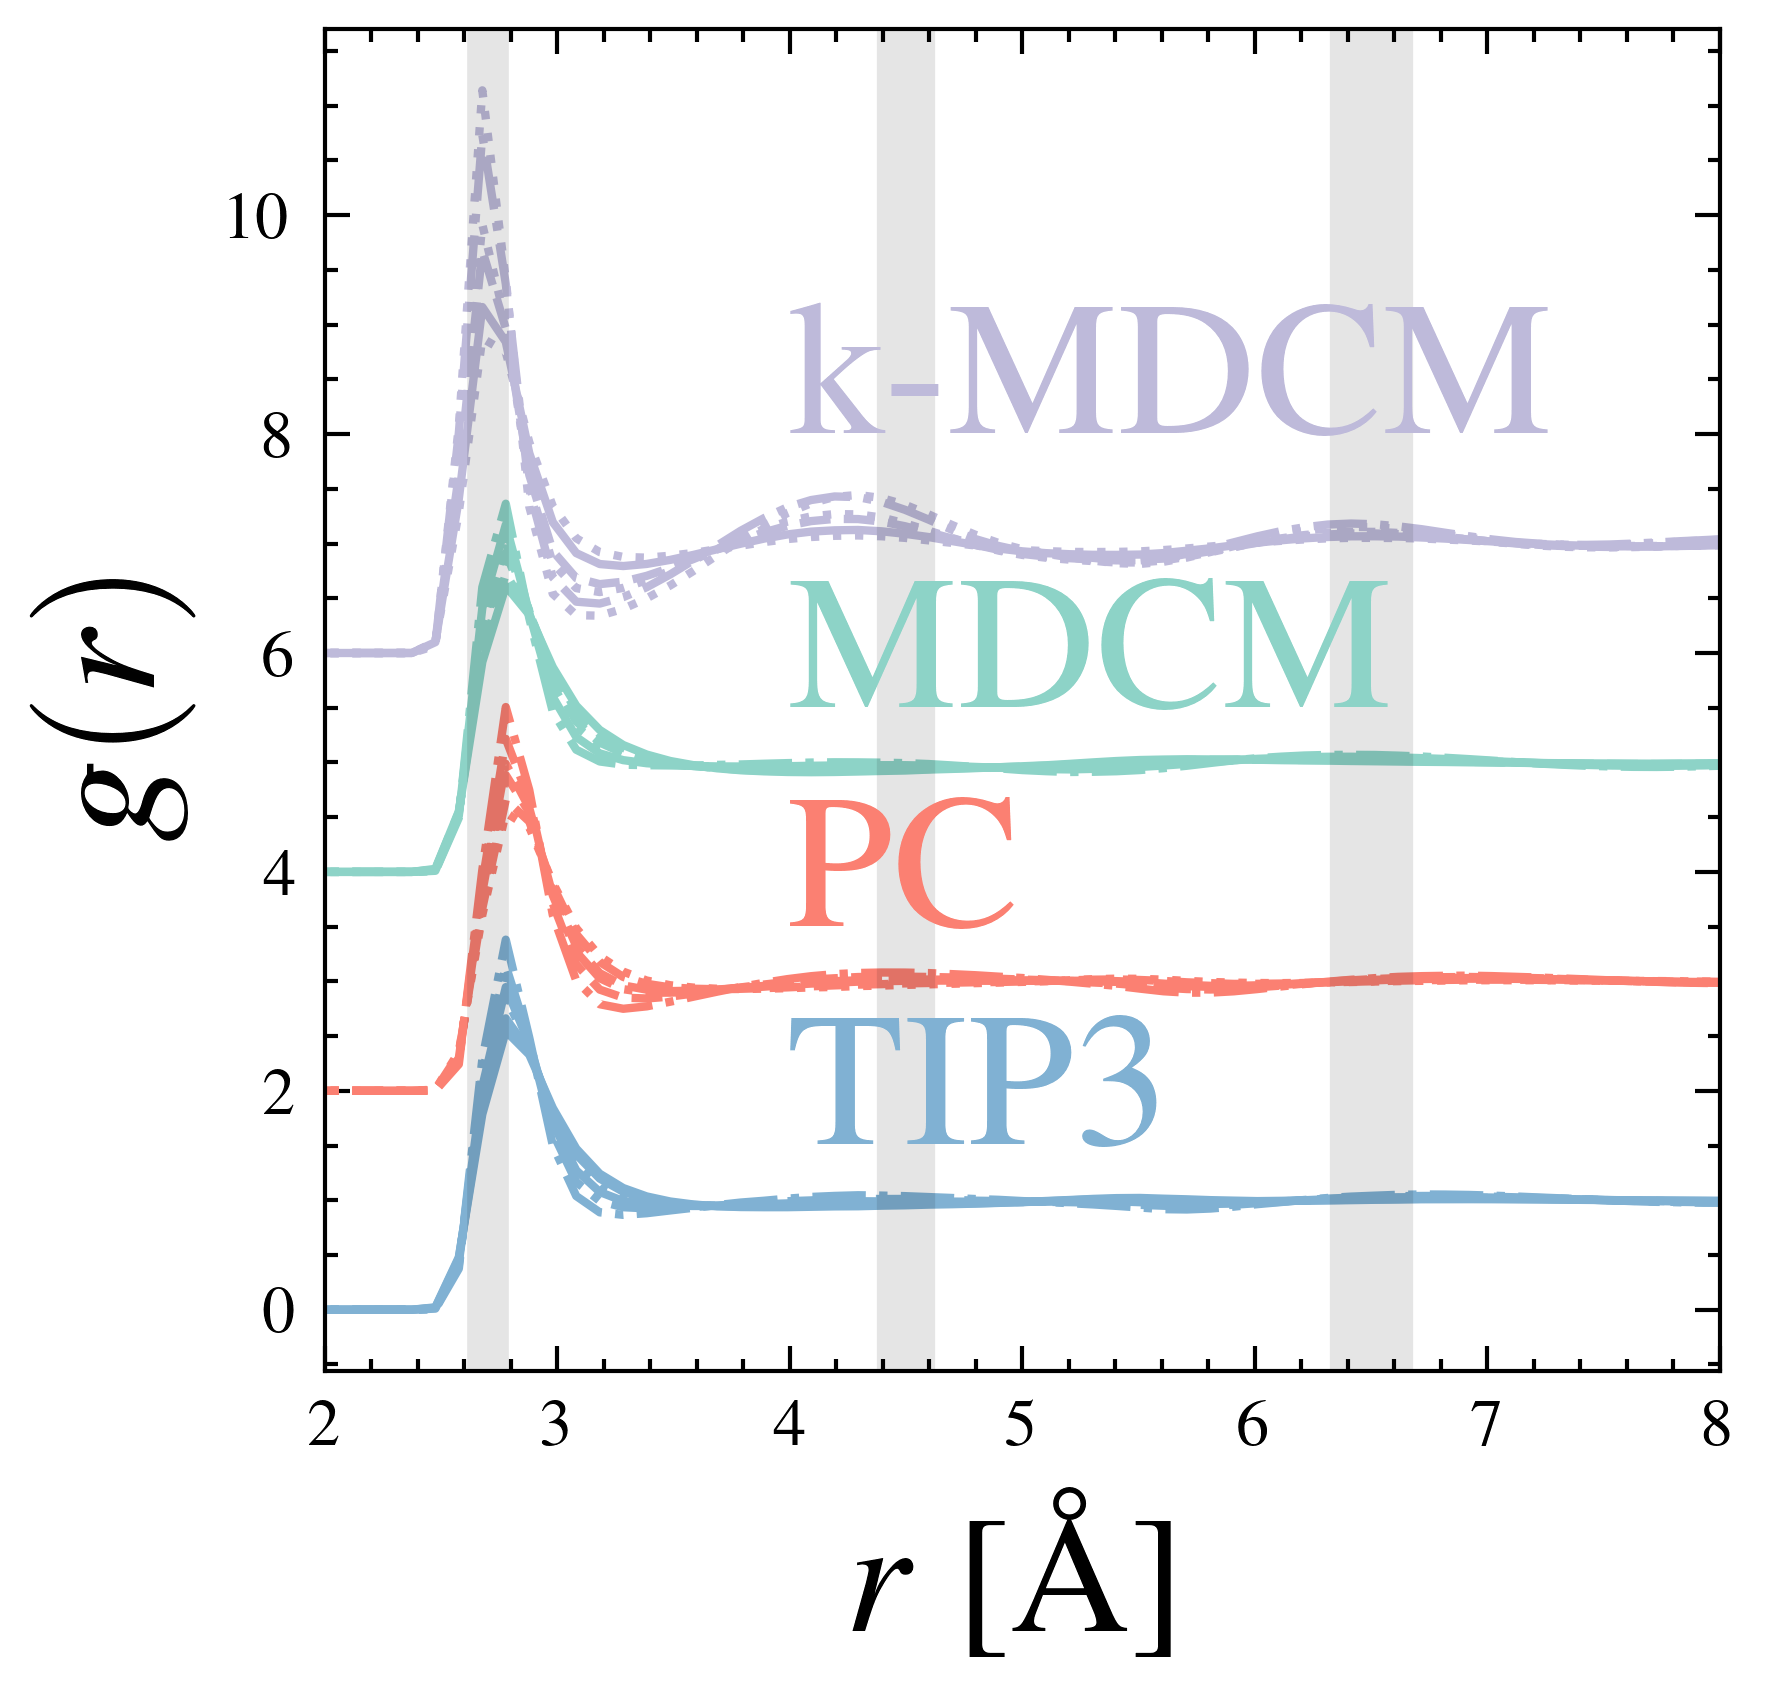

In [146]:
fig, axs = plt.subplots(2,1, gridspec_kw={"hspace":0,
                                      "wspace":1}, 
                        height_ratios=[3,.1],
                        figsize=(3,3))

for i, (k, df) in enumerate(zip(keys, dfs)):
    if k[0] == "mdcm":
        i = 2
    if k[0] == "optpc":
        i = 1
    if k[0] == "shake":
        i = 0
    if k[0] == "kmdcm":
        i = 3
        
    axs[0].plot(df["r"], df["g(r)"]+i*2, 
               c=cdict[k[0]],
                linewidth=1)
FONTSIZE = 23   
axs[0].text(4.,8,"k-MDCM",
            c=cdict["kmdcm"],
           fontsize=FONTSIZE)  
axs[0].text(4.,5.5,"MDCM",
            c=cdict["mdcm"],
           fontsize=FONTSIZE) 
axs[0].text(4.,3.5,"PC",
            c=cdict["optpc"],
           fontsize=FONTSIZE) 
axs[0].text(4.,1.5,"TIP3",
            c=cdict["shake"],
           fontsize=FONTSIZE) 
# axs[0].grid()
axs[0].axvline(2.7,linewidth=5,alpha=0.1)
axs[0].axvline(4.5,linewidth=7,alpha=0.1)
axs[0].axvline(6.5,linewidth=10,alpha=0.1)
# axs[0].set_ylim(0,10)
axs[0].set_xlim(2,8)
# axs[0].set_

axs[1].axis("off")
axs[0].set_ylabel("$g(r)$ ", fontsize=20)
axs[0].set_xlabel("$r$ [$\mathrm{\AA}$]", fontsize=20)

plt.savefig("comp_rdf.pdf", bbox_inches="tight")